In [2]:
"""
Can you repeat problem 2? This time, replace logistic regression with the Bayes classifier. 
Report your results (classification accuracy, precision, and recall). 
Compare your results against problem 2.
"""

'\nCan you repeat problem 2? This time, replace logistic regression with the Bayes classifier. \nReport your results (classification accuracy, precision, and recall). \nCompare your results against problem 2.\n'

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [8]:
breast = load_breast_cancer()

#Add target column 
labels = np.reshape(breast.target,(569,1))
#set data = data + target
final_breast_data = np.concatenate([breast.data,labels],axis=1)
#create data frame using data
df = pd.DataFrame(final_breast_data) 

In [9]:
#add column names to data frame
features = breast.feature_names 
features_labels = np.append(features,'label')
df.columns = features_labels

In [16]:
accuracy_history = np.zeros(30)
precision_history = np.zeros(30)
recall_history = np.zeros(30)
for k in range(30):
    x = df.loc[:, features].values 
    # Separating out the target 
    y = df.loc[:,['label']].values 
    # Standardizing the features 
    x = StandardScaler().fit_transform(x) 
    
    #Apply pca
    pca = PCA(n_components=k) 
    principalComponents = pca.fit_transform(x) 
    principalDf = pd.DataFrame(data = principalComponents) 

    finalDf = pd.concat([principalDf, df[['label']]], axis = 1) 
    
    #split set into training(0.8) and validations(0.2) sets
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
    
    #Apply the LogisticRegression function to training set and build model
    #Apply Naive Bayes to set
    model = GaussianNB()
    model.fit(X_train, Y_train)

    #Apply the model to the validation set
    Y_pred = model.predict(X_test)
    
    #add acccuracy, precision, and recall to their history 
    accuracy_history[k] = metrics.accuracy_score(Y_test, Y_pred)
    precision_history[k] = metrics.precision_score(Y_test, Y_pred)
    recall_history[k] = metrics.recall_score(Y_test, Y_pred)

C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

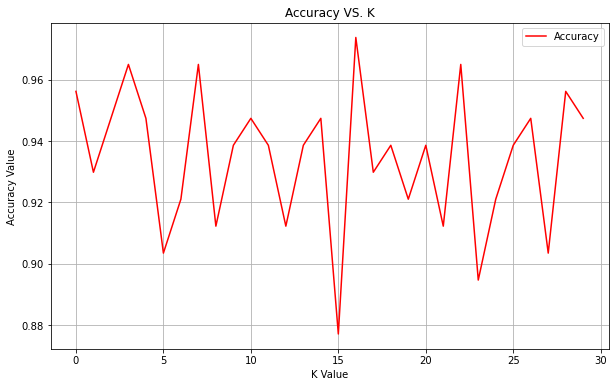

In [17]:
#graph accuracy
plt.plot(range(30),accuracy_history , color='red', label='Accuracy')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K Value') 
plt.ylabel('Accuracy Value') 
plt.title('Accuracy VS. K') 
plt.legend()

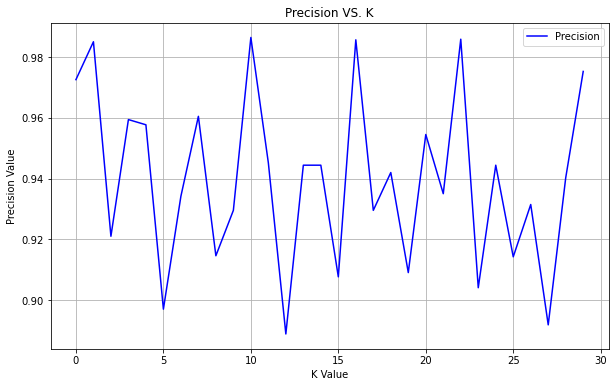

In [18]:
#plot precision
plt.plot(range(30),precision_history, color='blue', label='Precision') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K Value') 
plt.ylabel('Precision Value') 
plt.title('Precision VS. K') 
plt.legend()

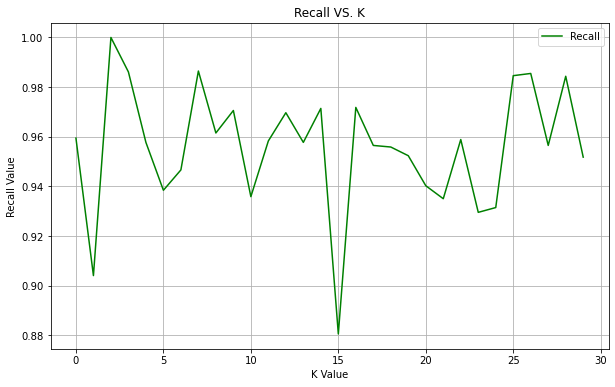

In [19]:
#graph
plt.plot(range(30),recall_history, color='green', label='Recall') #plot recall
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K Value') 
plt.ylabel('Recall Value') 
plt.title('Recall VS. K') 
plt.legend()